# Figure S1. Loss of TDP-43 leads to widespread alternative polyadenylation changes

## Load libraries and functions

In [2]:
library(data.table)
library(ggplot2)
library(stringr)
library(rstatix)
library(dplyr)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
library('Cairo')
CairoFonts(
regular="Sans:style=Light",
bold="Sans:style=Bold",
italic="Sans:style=Oblique",
bolditalic="Sans:style=BoldOblique"
)

## Fig. S1a, APA change observed by QAPA

In [5]:
liu_qapa_top_paired = fread("Fig_s1a_liu_2019_qapa_scaledTPM_DEXseq_top2_paired.csv")

In [6]:
liu_qapa_top_paired$APA_sig = factor(liu_qapa_top_paired$APA_sig, levels = c("proximal", "no", "distal"))

In [7]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig_s1a = ggplot(liu_qapa_top_paired, aes(log2FC, -log10(padj), color = APA_sig)) + 
    geom_point(size = 0.5, show.legend = F) +
    geom_hline(yintercept  = -log10(0.1), linewidth = 0.1, linetype = "dotted") +
     ggrepel::geom_label_repel(aes(label = ifelse(gene_label != "no", Gene_Name, "")),
                             show.legend = F, 
                             box.padding = 0.5, 
                             label.padding = 0.25,
                             #nudge_x = -0.1, 
                             #nudge_y = 0.1,
                             label.size = NA,
                             size =2,
                             segment.size = 0.1,
                             max.overlaps = 20) +
    scale_color_manual(values = c("dodgerblue3","lightgray", "firebrick3")) +
    labs(x = "log2(fold change, APA by QAPA)",
         y = "-log10(p adjusted)") + 
    theme_classic(base_size = 7)

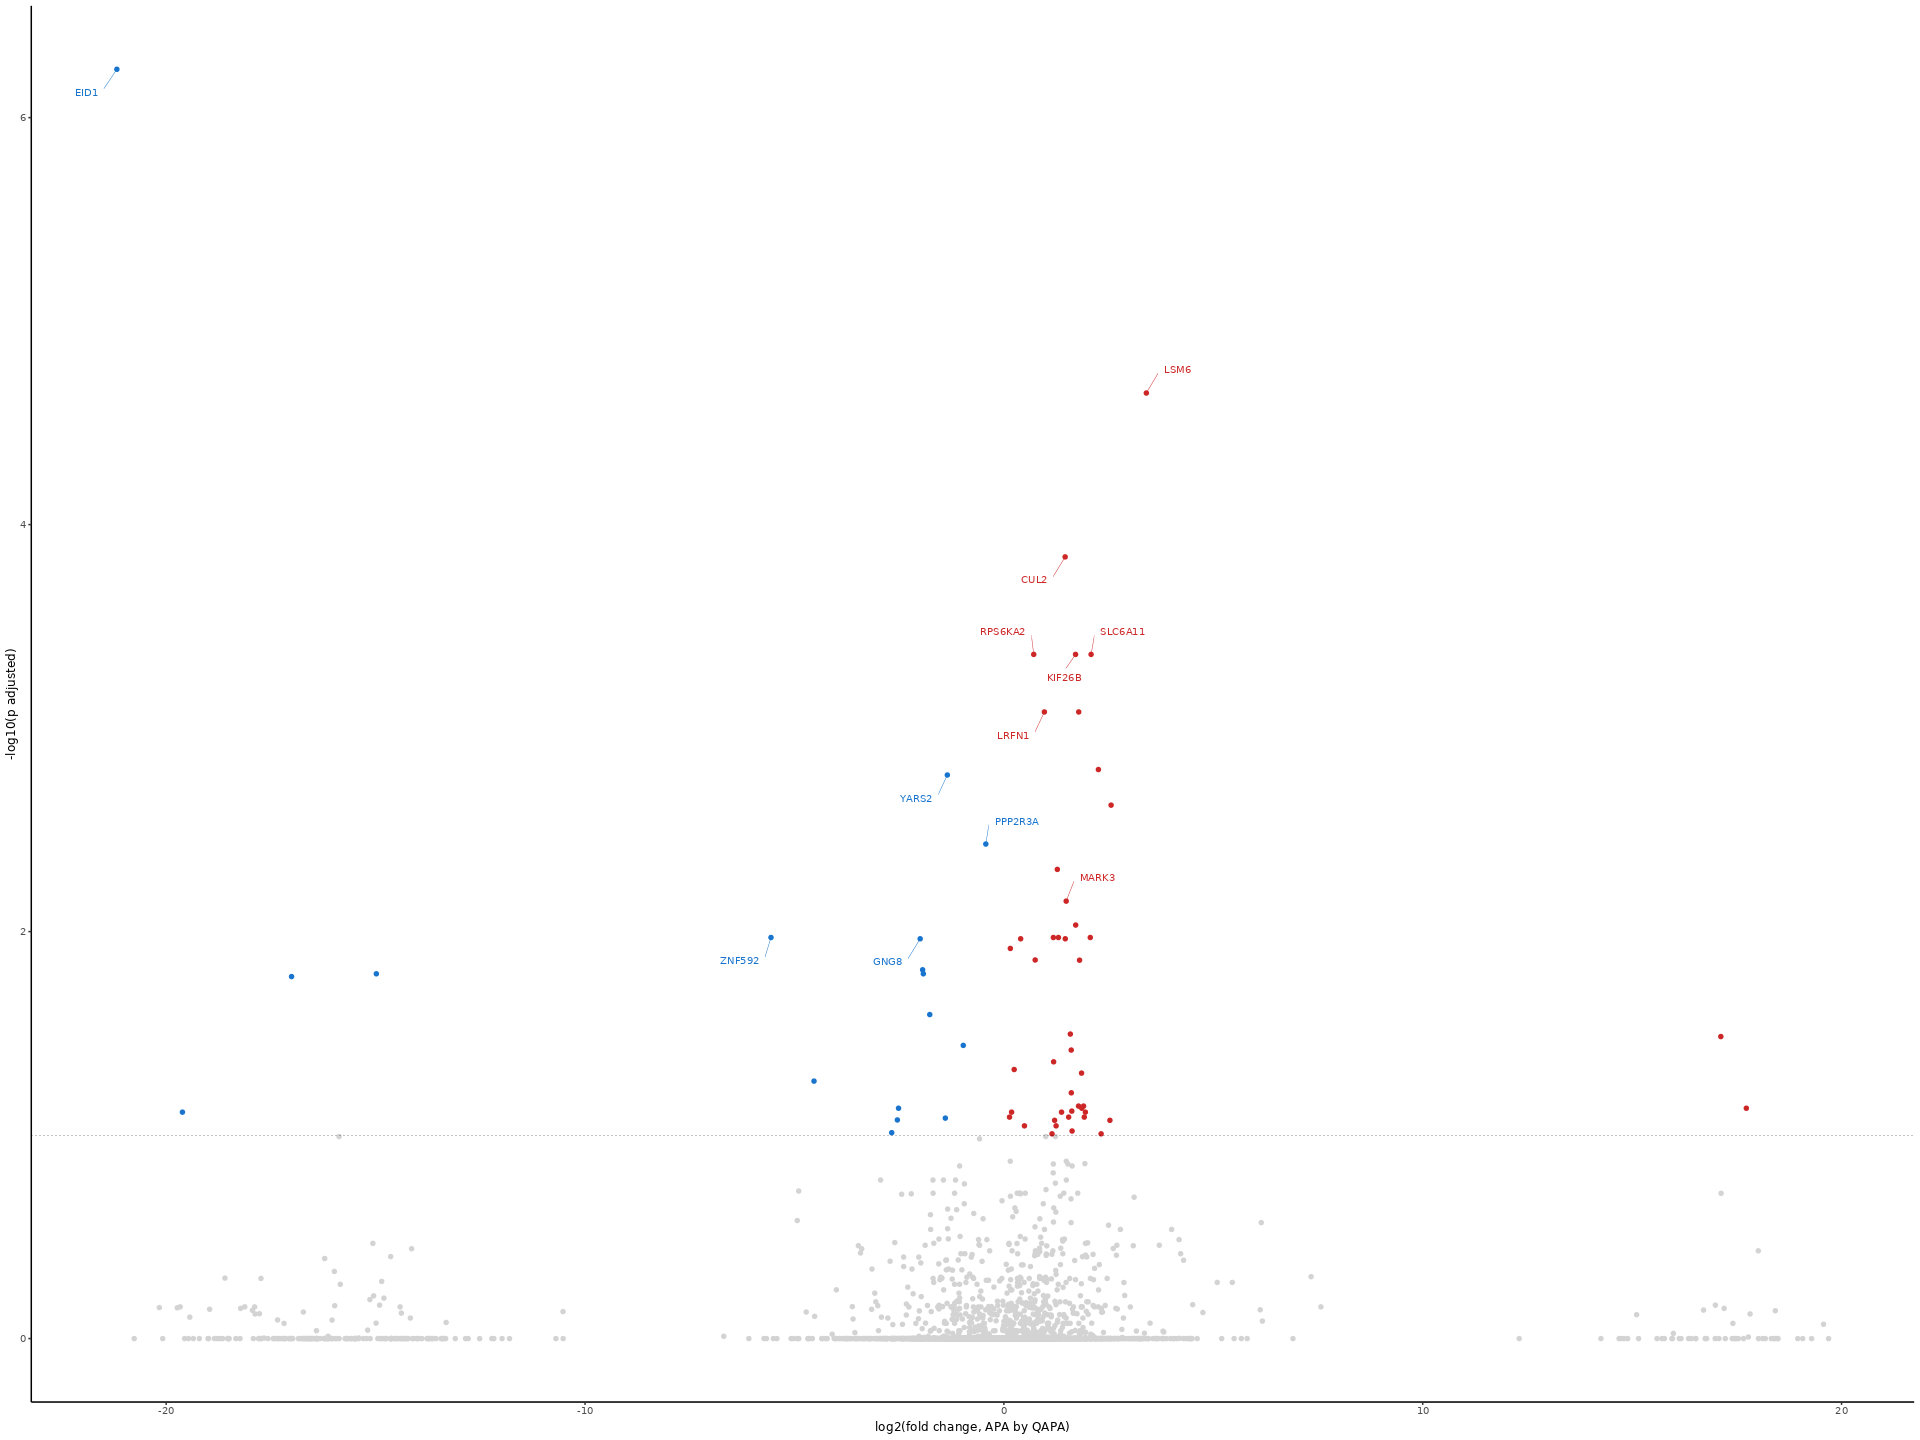

In [8]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig_s1a

In [9]:
ggsave(fig_s1a, file = "fig_s1a.pdf", width = 3, height = 3, units = "in", dpi = 300)

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


## Fig. S1b, The relationship between APA change and RNA level change

In [10]:
liu_deg_apa = fread("Fig_s1b_Liu_2019_apa_deg_correlation.csv")

In [11]:
liu_deg_apa$RNA_change = factor(liu_deg_apa$RNA_change, levels = c("Increased", "NC", "Decreased"))

In [12]:
fig_s1b = ggplot(liu_deg_apa, aes(log2FoldChange, -log10(padj), color = RNA_change)) + 
    geom_point(size = 0.5) +
    geom_hline(yintercept  = -log10(0.1), linewidth = 0.1, linetype = "dotted") +
    ggrepel::geom_text_repel(aes(label = ifelse(RNA_change == "Increased", Gene, "")),
                             show.legend = F, 
                             box.padding = 0.1,
                             nudge_x = 0.5, 
                             nudge_y = 0.2,
                             size =1.5, 
                             segment.size = 0.01,
                             max.overlaps = Inf) +
    ggrepel::geom_text_repel(aes(label = ifelse(RNA_change == "Decreased", Gene, "")),
                             show.legend = F, 
                             box.padding = 0.1,
                             nudge_x = -0.5, 
                             nudge_y = 0.2,
                             size =1.5, 
                             segment.size = 0.01,
                             max.overlaps = Inf) +
    scale_color_manual(values = c("firebrick3","lightgray", "dodgerblue3"),
                       name = "RNA level change\nfor genes with APA change:",
                       labels = c("Increased", "None", "Reduced")) +
    labs(title = "RNA level change", 
         x = "log2(Fold change)",
         y = "log10(p adjusted)") + 
    theme_classic(base_size = 6)

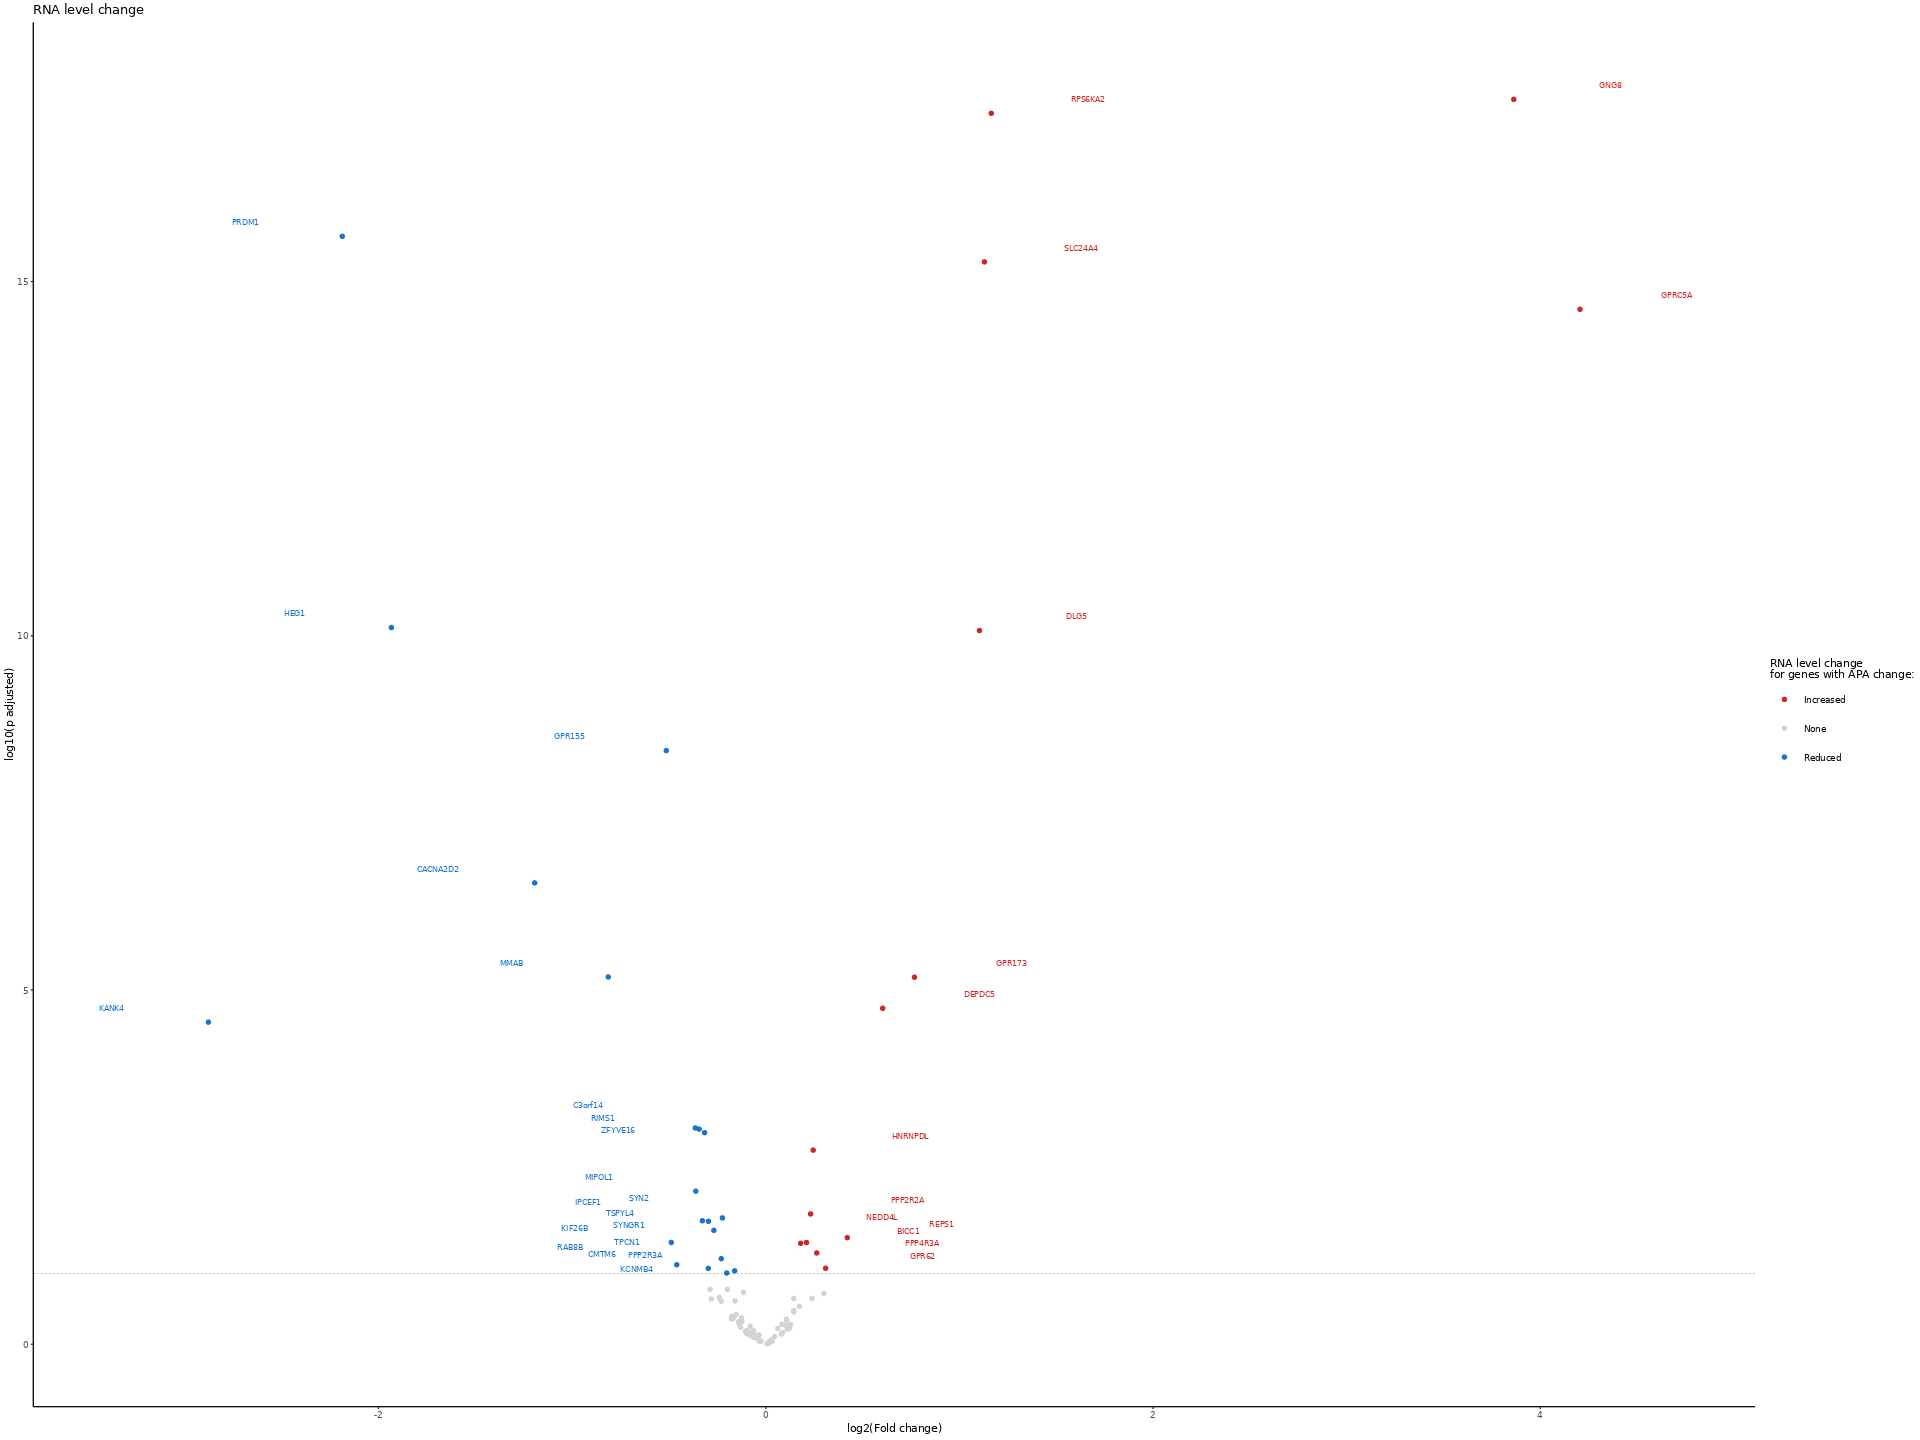

In [13]:
fig_s1b

In [14]:
ggsave(fig_s1b, file = "fig_s1b.pdf", width = 4, height = 2.5, units = "in", dpi = 300)

## Fig. S1c, iNeuron differentiation and shRNA treatment scheme

made in illustrator

## Fig. S1d, expression of specific cell type markers

Expression data from Pineda et al and images were stained with specific markers and processed using imageJ

## Fig. S1e, APA changes in TDP-43 KD in iPSC-motor neurons

In [19]:
klim_apalyzer_3utr = fread("Fig_s1e_klim_apalyzer_3utr.csv")

In [20]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig_s1e = ggplot(klim_apalyzer_3utr, 
       aes(RED, 
           -log10(padj), color = APAreg)) + 
    geom_point(size = 0.25, show.legend = F) +
    geom_hline(yintercept  = -log10(0.1), linewidth = 0.1, linetype = "dotted") +
    ggrepel::geom_label_repel(aes(label = ifelse(APAreg != "NC", gene_symbol, "")),
                             show.legend = F, 
                             box.padding = 0.5, 
                             label.padding = 0.25,
                             #nudge_x = -0.1, 
                             #nudge_y = 0.1,
                             label.size = NA,
                             size =2,
                             segment.size = 0.1,
                             max.overlaps = 20) +
    scale_color_manual(values = c("dodgerblue3","lightgray", "firebrick3"),
                       name = "Preferred PAS",
                       labels = c("Proximal PAS", "No change", "Distal PAS")) +
    labs(x = "DeltaPUI (TDP-43 KD in iMNs)",
         y = "log10(p adjusted)") + 
    theme_classic(base_size = 8)

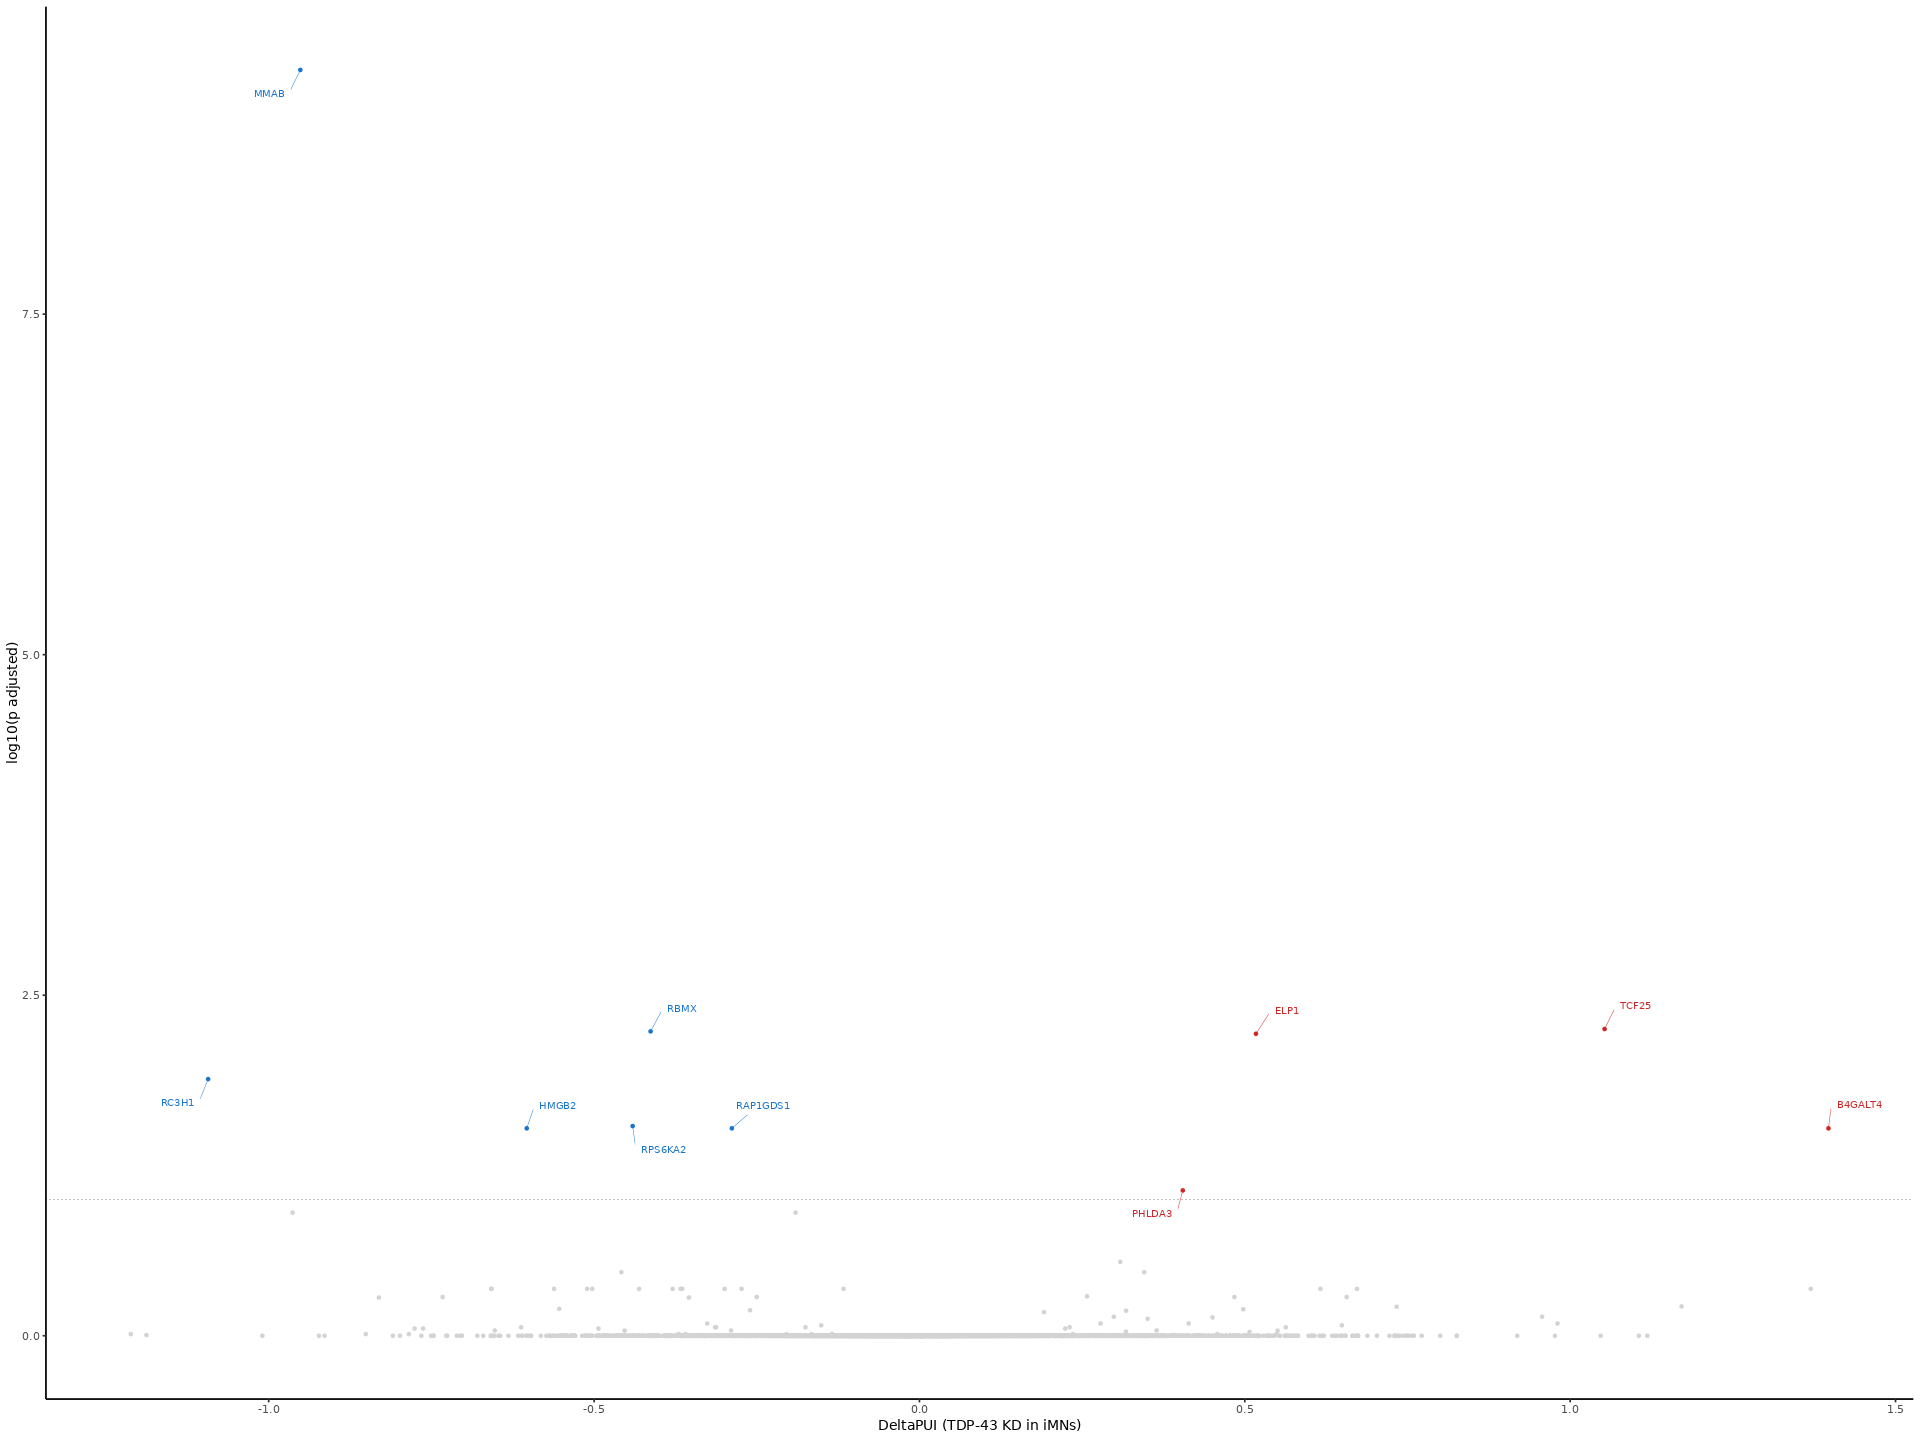

In [21]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig_s1e

In [22]:
ggsave(fig_s1e, file = "fig_s1e.pdf", width = 3, height = 3, units = "in", dpi = 300)

## Fig. S1f, APA changes in iPSC-neurons carrying TDP43-K263E mutation

In [30]:
in_k263e_apalyzer_3utr = fread("Fig_s1f_in_k263e_apalyzer_3utr.csv")

In [31]:
## adjusted p values are kept at -log10(padj) == 25 to plotting purpose
in_k263e_apalyzer_3utr[, neglog10padj := -log10(padj)]
in_k263e_apalyzer_3utr[neglog10padj >= 25, neglog10padj := 25]

In [32]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig_s1f = ggplot(in_k263e_apalyzer_3utr, 
       aes(RED, 
           neglog10padj, color = APAreg)) + 
    geom_point(size = 0.25, show.legend = F) +
    geom_hline(yintercept  = -log10(0.1), linewidth = 0.1, linetype = "dotted") +
    ggrepel::geom_label_repel(aes(label = ifelse(APAreg != "NC", gene_symbol, "")),
                             show.legend = F, 
                             box.padding = 0.5, 
                             label.padding = 0.25,
                             #nudge_x = -0.1, 
                             #nudge_y = 0.1,
                             label.size = NA,
                             size =2,
                             segment.size = 0.1,
                             max.overlaps = 10) +
    scale_color_manual(values = c("dodgerblue3","lightgray", "firebrick3"),
                       name = "Preferred PAS",
                       labels = c("Proximal PAS", "No change", "Distal PAS")) +
    labs(x = "DeltaPUI (iNeurons with TDP-43-K263E)",
         y = "log10(p adjusted)") + 
    theme_classic(base_size = 8)

Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


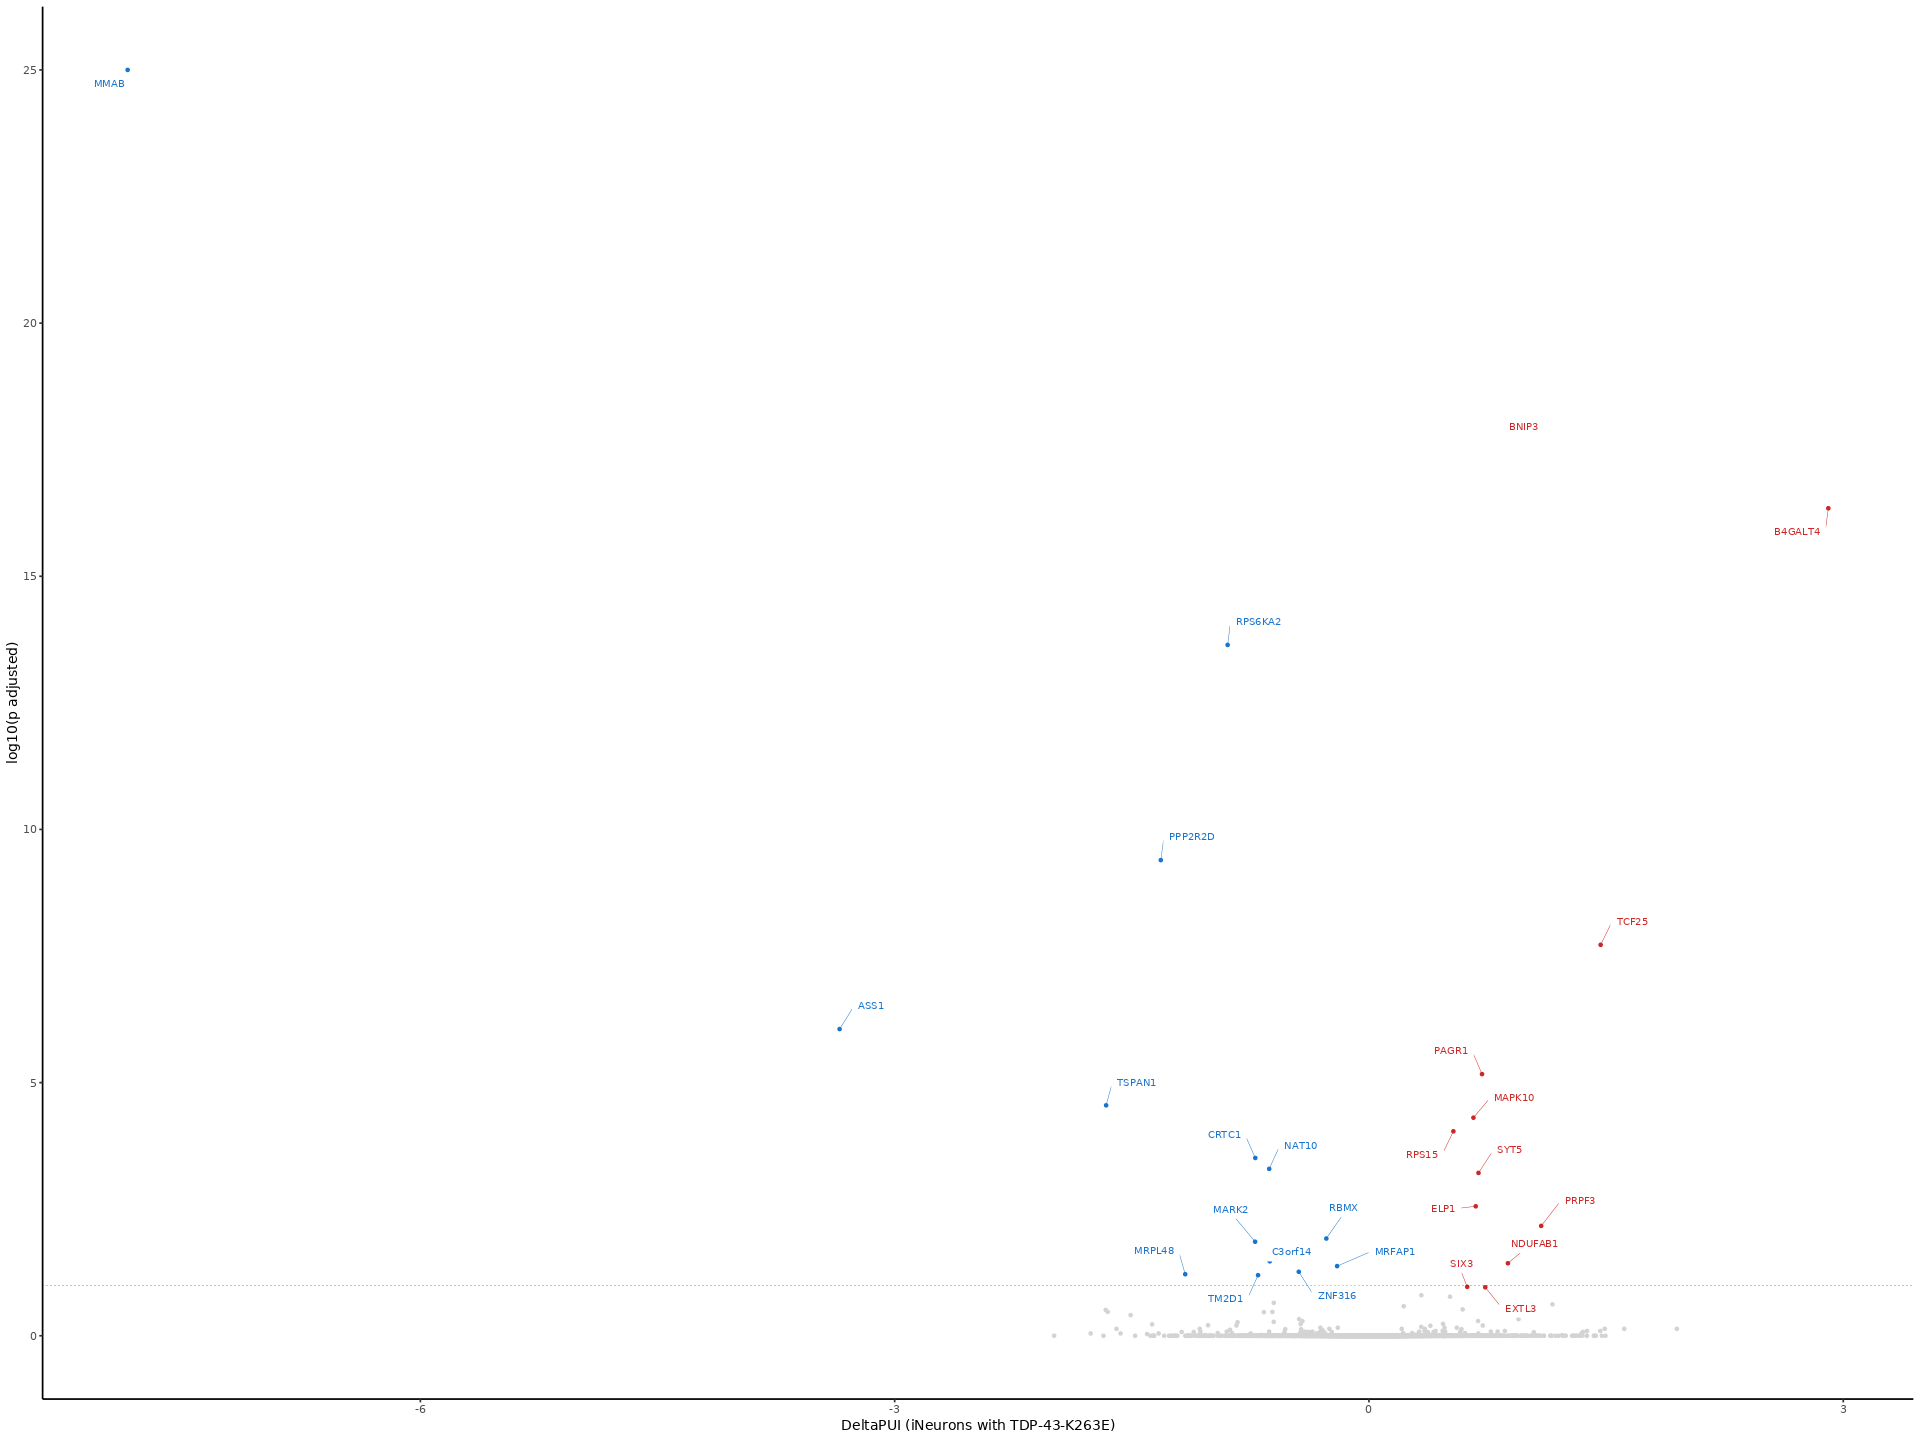

In [33]:
fig_s1f

In [34]:
ggsave(fig_s1f, file = "fig_s1f.pdf", width = 3, height = 3, units = "in", dpi = 300)

Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


## Fig. S1g, APA changes in iPSC-MNs carrying TDP43-M337V mutation

In [41]:
iMN_m337v_apalyzer_3utr = fread("Fig_s1g_iMN_m337v_apalyzer_3utr.csv")

In [42]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig_s1g = ggplot(iMN_m337v_apalyzer_3utr, 
       aes(RED, 
           -log10(padj), color = APAreg)) + 
    geom_point(size = 0.25, show.legend = F) +
    geom_hline(yintercept  = -log10(0.1), linewidth = 0.1, linetype = "dotted") +
    ggrepel::geom_label_repel(aes(label = ifelse(APAreg != "NC", gene_symbol, "")),
                             show.legend = F, 
                             box.padding = 0.5, 
                             label.padding = 0.25,
                             #nudge_x = -0.1, 
                             #nudge_y = 0.1,
                             label.size = NA,
                             size =2,
                             segment.size = 0.1,
                             max.overlaps = 20) +
    scale_color_manual(values = c("dodgerblue3","lightgray", "firebrick3"),
                       name = "Preferred PAS",
                       labels = c("Proximal PAS", "No change", "Distal PAS")) +
    labs(x = "DeltaPUI (iMNs with TDP-43-M337V)",
         y = "log10(p adjusted)") + 
    theme_classic(base_size = 8)

Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


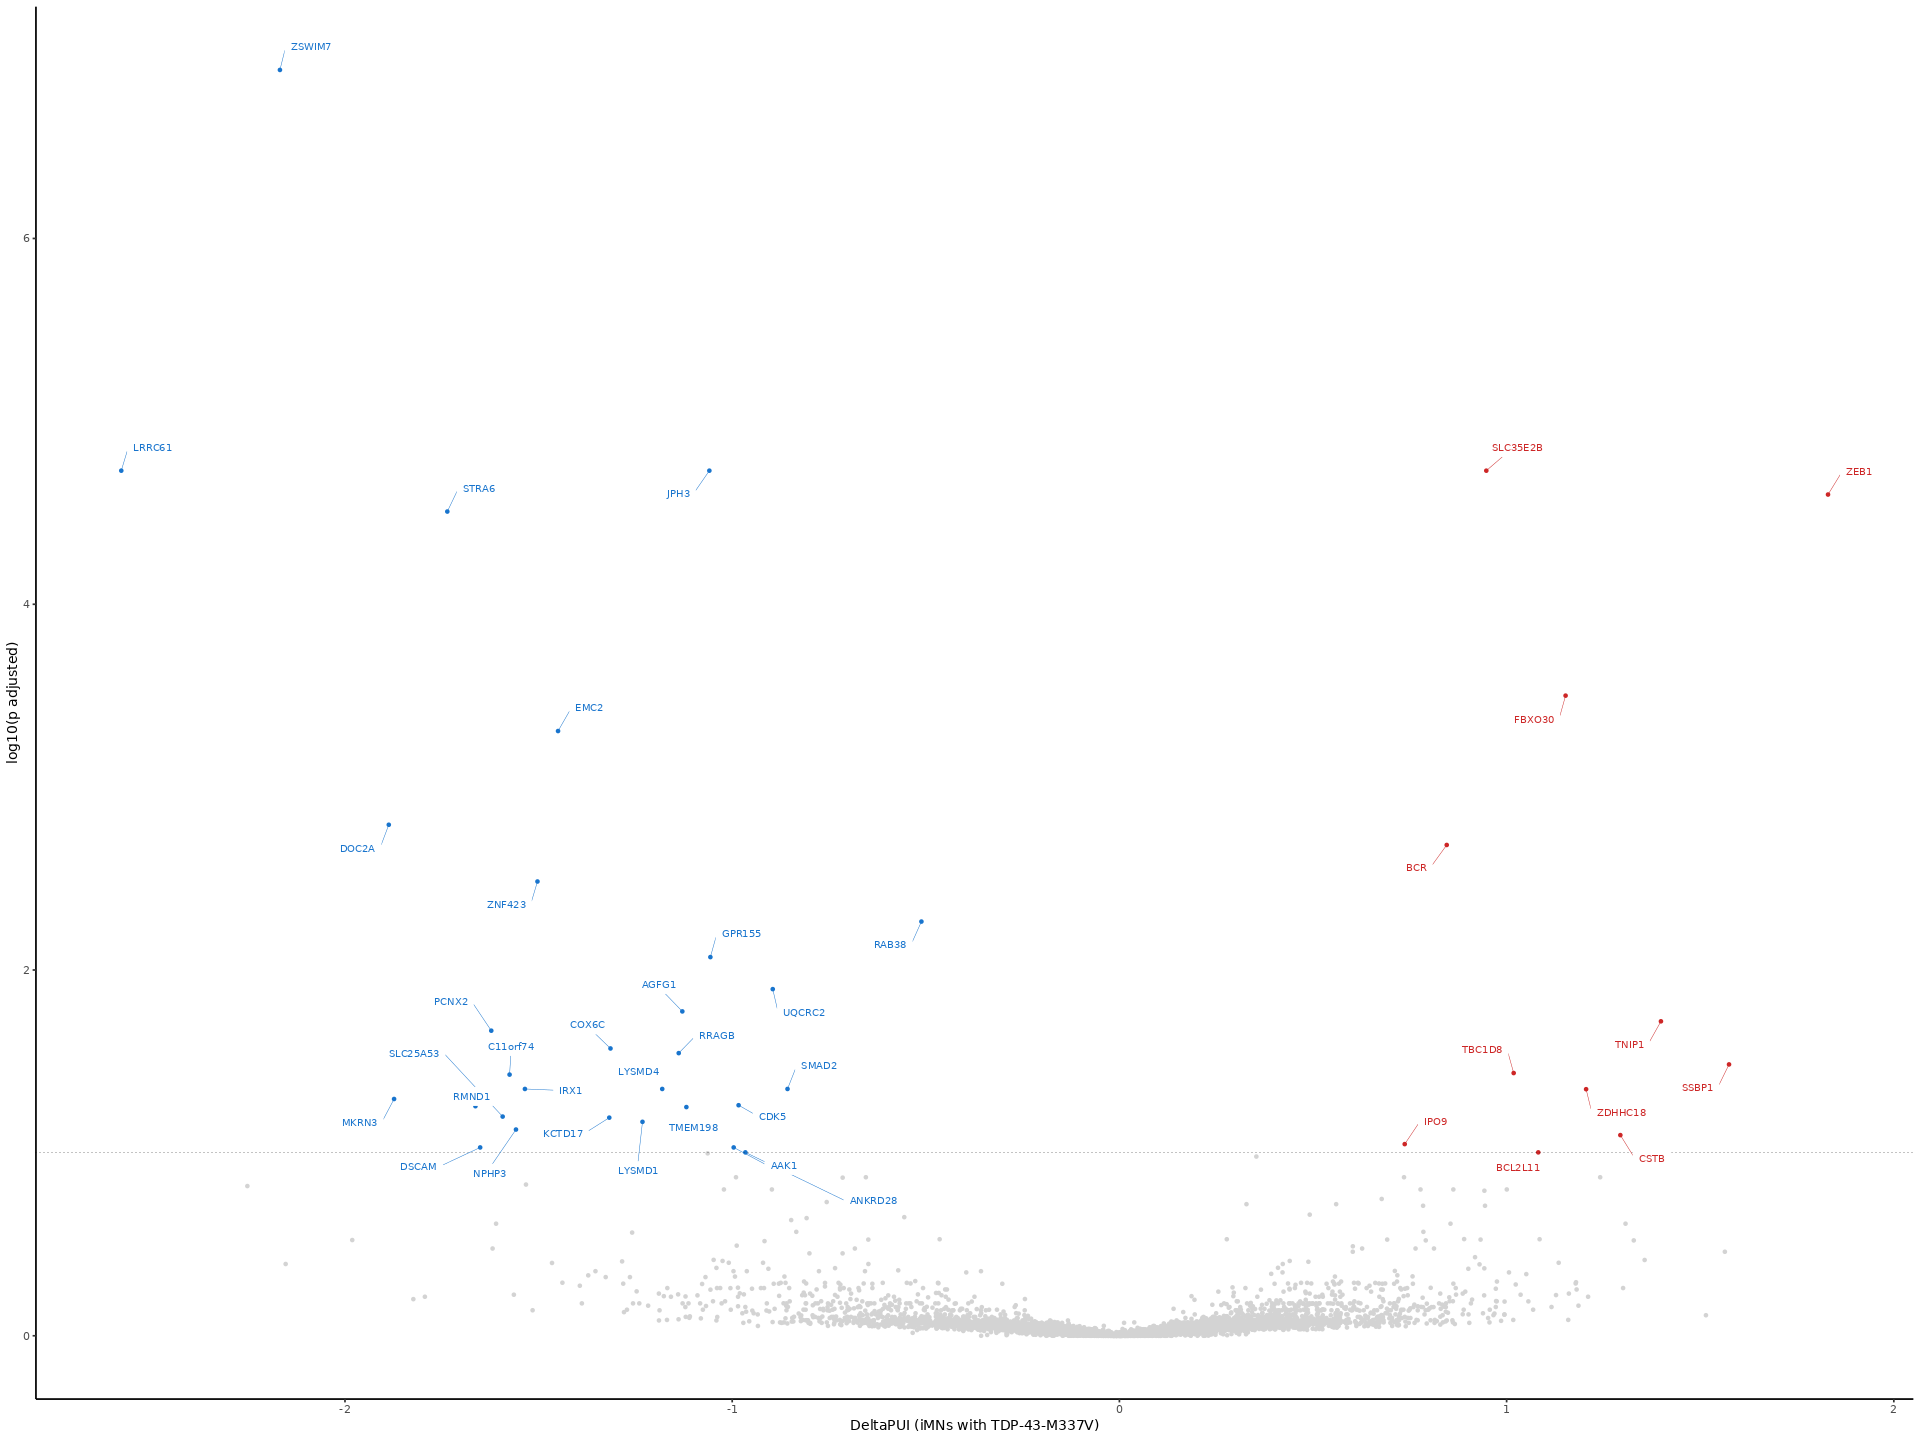

In [43]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig_s1g

In [45]:
ggsave(fig_s1g, file = "fig_s1g.pdf", width = 3, height = 3, units = "in", dpi = 300)

Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [46]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /share/software/user/open/openblas/0.3.10/lib/libopenblas_haswellp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Cairo_1.6-2       dplyr_1.1.4       rstatix_0.7.2     stringr_1.5.1    
[5] ggplot2_3.5.0     data.table_1.15.2

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.12       pillar_1.9.0      compiler_4.2.0    base64enc_0.1-3  
 [5] tools_4.2.0       getPass_0.2-4     digest_0.6.3